# Data Cleaning

In [4]:
import pandas as pd
data = pd.read_csv('airline-safety.csv')
data.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [5]:
data.tail()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
51,United / Continental*,7139291291,19,8,319,14,2,109
52,US Airways / America West*,2455687887,16,7,224,11,2,23
53,Vietnam Airlines,625084918,7,3,171,1,0,0
54,Virgin Atlantic,1005248585,1,0,0,0,0,0
55,Xiamen Airlines,430462962,9,1,82,2,0,0


In [8]:
data.isna().any()

airline                   False
avail_seat_km_per_week    False
incidents_85_99           False
fatal_accidents_85_99     False
fatalities_85_99          False
incidents_00_14           False
fatal_accidents_00_14     False
fatalities_00_14          False
dtype: bool

In [9]:
data.isna().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [10]:
data.isna().any().sum()

0

# Data selection Using Filter Method

In [16]:
import pandas as pd
data = pd.read_csv('airline-safety.csv')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [21]:
df = pd.read_csv('airline-safety.csv')

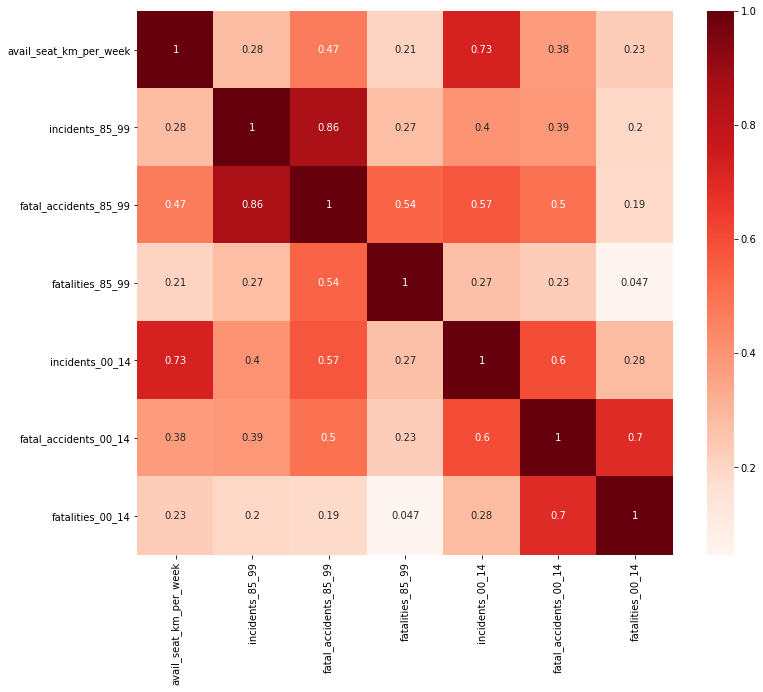

In [22]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
cor_target = abs(cor["avail_seat_km_per_week"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

avail_seat_km_per_week    1.000000
incidents_00_14           0.725917
Name: avail_seat_km_per_week, dtype: float64

# Data Split Using K-Fold Validation

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape
((150, 4), (150,))

((150, 4), (150,))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=0)

In [71]:
X_train.shape, y_train.shape
((90, 4), (90,))
X_test.shape, y_test.shape
((60, 4), (60,))

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [75]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(100, 20) (100,)


In [77]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)
Accuracy: 0.850 (0.128)
